In [ ]:
import matplotlib.pyplot as plt

## 데이터 로드 ###
데이터 로드 및 전처리 부분 생략(보안이슈)
분석 부분만 기록

In [150]:
# 데이터 가명 처리

rs_df.columns = list(map(chr, range(ord('A'), ord('X') + 1))) + ["age"]

In [144]:
# 멀티 인덱스 생성

num_col = rs_df.columns[:-1]
cat_col = ['age']
mult_idx = pd.MultiIndex.from_product([num_col, cat_col],names=['x', 'age'])

In [166]:
#아노바 분석 수행

anova_tables = []
for x, age in mult_idx:
    
    model = ols('{} ~ {}'.format(x, age), data=rs_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)
    anova_tables.append(anova_table)

df_anova_tables = pd.concat(anova_tables, keys=mult_idx, axis=0)

In [167]:
# 보기 불편하니 지수값 변환
귀무가설 = []
대립가설 = []
for i in num_col:
    df_anova_tables.loc[(i, 'age', 'age')]['PR(>F)'] = np.exp(df_anova_tables.loc[(i, 'age', 'age')]['PR(>F)'])
    # print(df_anova_tables.loc[(i, 'age', 'age')]['PR(>F)']-1) 
    if (df_anova_tables.loc[(i, 'age', 'age')]['PR(>F)']-1) > 0.05:
        귀무가설.append([i, (df_anova_tables.loc[(i, 'age', 'age')]['PR(>F)'])])
    else:
        대립가설.append([i, (df_anova_tables.loc[(i, 'age', 'age')]['PR(>F)'])])

### 귀무가설 : 각 게시판 유형에 연령대별 이용평균을 동일하다.
### 대립가설 : 각 게시판 유형에 연령대별 이용평균은 동일하지 않다. 

In [173]:
categories = [ item for item in num_col ]
values = [ (df_anova_tables.loc[(item, 'age', 'age')]['PR(>F)']) for item in num_col ]

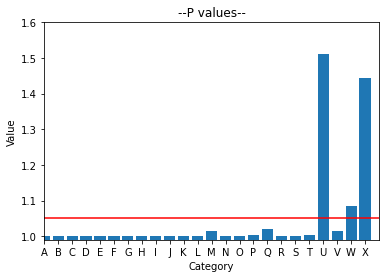

In [185]:
plt.bar(categories, values)
plt.axis([0, 24, 0.99, 1.6])
plt.axhline(y=1.05, color='red')
plt.xlabel("Category")
plt.ylabel("Value")
plt.title("--P values--")

plt.show()

#### 결론
- 24개 유형 중 21개 유형에서 귀무가설 기각하고 대립가설을 채택
- 21개 유형은 연령대별 이용 평균에서 유의미한 차이를 가진다.
- 연령대과 주 이용 게시판 사이에는 상관관계가 존재하기 때문에 이를 추천 모델 feature로 사용
